## Wildfire prediction

#### Module imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
# display all columns
pd.set_option('display.max_columns', 100)

#### Dataset import and preprocessing

In [3]:
train_df = pd.read_csv("Train.csv")

In [4]:
train_df.sample(5)

,ID,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
25774,190_2005-01-01,-18.358835,27.487029,0.000000,1221,194,115,1416,120,6,388,2292,0,189,307,2216,110,187,1026.547436,0.0,0.0,0.0,0.0,0.206161,0.000000,0.793839,0.000000,0.0,0.151916
3747,16_2001-08-01,-16.358835,29.237029,0.465527,86,1350,378,1437,0,0,357,2307,0,126,284,1145,153,274,975.081929,0.0,0.0,0.0,0.0,0.184068,0.710875,0.105057,0.000000,0.0,0.000081
4715,451_2001-09-01,-20.858835,30.487029,0.000000,210,1306,415,1517,20,1,139,2438,0,132,297,1249,161,271,701.072952,0.0,0.0,0.0,0.0,0.085068,0.000000,0.914932,0.000000,0.0,0.020521
39957,515_2007-03-01,-21.858835,29.987029,0.000000,409,1186,-155,1595,43,2,6,2599,0,194,338,2168,162,183,565.473969,0.0,0.0,0.0,0.0,0.054203,0.000000,0.945490,0.000307,0.0,0.123371
77018,266_2013-01-01,-18.858835,32.237029,0.000000,1211,0,107,1211,253,47,1061,2046,0,166,269,1939,79,214,1133.439596,0.0,0.0,0.0,0.0,0.092814,0.004543,0.902643,0.000000,0.0,0.415126


In [5]:
train_df.shape

(83148, 29)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83148 entries, 0 to 83147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             83148 non-null  object 
 1   lat            83148 non-null  float64
 2   lon            83148 non-null  float64
 3   burn_area      83148 non-null  float64
 4   climate_aet    83148 non-null  int64  
 5   climate_def    83148 non-null  int64  
 6   climate_pdsi   83148 non-null  int64  
 7   climate_pet    83148 non-null  int64  
 8   climate_pr     83148 non-null  int64  
 9   climate_ro     83148 non-null  int64  
 10  climate_soil   83148 non-null  int64  
 11  climate_srad   83148 non-null  int64  
 12  climate_swe    83148 non-null  int64  
 13  climate_tmmn   83148 non-null  int64  
 14  climate_tmmx   83148 non-null  int64  
 15  climate_vap    83148 non-null  int64  
 16  climate_vpd    83148 non-null  int64  
 17  climate_vs     83148 non-null  int64  
 18  elevat

In [7]:
train_df.describe()

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
count,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.0,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,8.314800e+04,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000,83148.000000
mean,-19.014557,29.860856,0.007632,484.491124,828.892721,-30.806237,1313.382992,54.576322,6.215134,305.477919,2281.967901,0.0,140.830303,285.288654,1554.532123,127.380117,208.414574,978.992612,0.006158,0.000017,0.008583,4.066313e-08,0.160628,0.037453,0.785382,0.000354,0.001424,0.078551
std,1.588444,1.751090,0.029226,470.467480,546.934469,235.802930,315.209838,71.997561,21.480399,400.956123,333.049616,0.0,44.631924,34.840502,458.461471,44.172381,47.550163,297.497348,0.053111,0.000141,0.059046,3.535121e-06,0.192957,0.106050,0.233953,0.001773,0.014233,0.104464
min,-22.358835,25.487029,0.000000,0.000000,0.000000,-563.000000,587.000000,0.000000,0.000000,1.000000,1167.000000,0.0,19.000000,139.000000,704.000000,32.000000,48.000000,265.379418,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000019,0.000000,0.000000,0.000000
25%,-20.358835,28.487029,0.000000,50.000000,375.000000,-212.000000,1081.000000,1.000000,0.000000,70.000000,2028.000000,0.0,103.000000,262.000000,1139.000000,97.000000,174.000000,768.375959,0.000000,0.000000,0.000000,0.000000e+00,0.014993,0.000000,0.655322,0.000000,0.000000,0.002017
50%,-18.858835,29.987029,0.000000,302.000000,858.000000,-108.000000,1290.000000,22.000000,1.000000,149.000000,2272.000000,0.0,150.000000,287.000000,1544.000000,118.000000,205.000000,1022.813217,0.000000,0.000000,0.000000,0.000000e+00,0.076706,0.000139,0.880600,0.000000,0.000000,0.028503
75%,-17.858835,31.237029,0.000000,931.000000,1211.000000,142.000000,1517.000000,87.000000,4.000000,329.000000,2545.000000,0.0,177.000000,310.000000,1942.000000,149.000000,241.000000,1197.977194,0.000000,0.000000,0.000000,0.000000e+00,0.246498,0.015166,0.971209,0.000000,0.000000,0.125500
max,-15.858835,32.987029,0.843886,1713.000000,2614.000000,851.000000,2620.000000,501.000000,342.000000,3319.000000,3170.000000,0.0,244.000000,400.000000,2786.000000,344.000000,393.000000,1771.930689,0.828131,0.004918,0.711603,3.073689e-04,0.981472,0.881323,1.000000,0.016708,0.301823,0.801328


In [8]:
#checking null values in the dataset
train_df.isnull().sum()

ID               0
lat              0
lon              0
burn_area        0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_swe      0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64

The dataset does not contain any empty values

#### Relationships in the dataset

To check the relationships among the features in the dataset, we drop the ID column because its a string object. lets create a new dataframe for this activity

In [9]:
new_train_df = train_df.drop("ID", axis=1)

In [10]:
corr_matrix = new_train_df.corr()
corr_matrix

,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
lat,1.000000,-0.009931,0.140848,0.130223,-0.115963,0.119602,-0.006853,0.120262,0.125682,0.447522,-0.030161,NaN,0.032225,-0.077548,0.047594,-0.099412,0.129508,0.201748,0.140433,0.072548,-0.015160,0.008369,0.124479,0.357617,-0.294955,0.075989,0.024794,0.124445
lon,-0.009931,1.000000,-0.021698,0.045632,-0.180351,-0.106239,-0.244830,0.049407,0.067602,0.131348,-0.078773,NaN,-0.076567,-0.281625,0.081289,-0.382234,-0.318246,-0.053191,-0.095089,-0.071194,0.226639,-0.028731,-0.162896,0.071514,0.066295,-0.070742,0.009964,0.039417
burn_area,0.140848,-0.021698,1.000000,-0.211806,0.279511,-0.014831,0.168871,-0.170532,-0.071414,-0.089246,0.160517,NaN,-0.099436,0.040500,-0.221348,0.219974,0.261562,0.074576,-0.008137,-0.007266,-0.008348,0.000964,0.013846,0.151957,-0.075815,-0.027734,-0.005215,-0.169218
climate_aet,0.130223,0.045632,-0.211806,1.000000,-0.818296,0.236423,0.072684,0.861178,0.356981,0.511211,0.014277,NaN,0.656521,0.181461,0.781435,-0.331980,-0.313663,0.060108,0.014675,0.008974,0.055593,-0.002061,0.033762,0.049087,-0.067938,0.005659,0.007096,0.814464
climate_def,-0.115963,-0.180351,0.279511,-0.818296,1.000000,-0.244483,0.513798,-0.733895,-0.371812,-0.571517,0.482297,NaN,-0.215974,0.316666,-0.524649,0.740823,0.629215,-0.103399,0.010289,0.008179,-0.102870,0.006382,-0.009063,-0.065703,0.061290,0.017919,-0.008980,-0.699364
climate_pdsi,0.119602,-0.106239,-0.014831,0.236423,-0.244483,1.000000,-0.071354,0.228946,0.259538,0.352147,-0.140453,NaN,0.069198,-0.054981,0.052212,-0.070846,-0.064794,0.017090,0.039191,0.026469,-0.034536,-0.001987,0.041898,0.022778,-0.045044,0.023955,-0.003540,0.209486
climate_pet,-0.006853,-0.244830,0.168871,0.072684,0.513798,-0.071354,1.000000,0.011939,-0.112333,-0.228662,0.858159,NaN,0.605146,0.820306,0.255992,0.789940,0.623619,-0.089707,0.039757,0.027589,-0.095521,0.007991,0.034663,-0.040735,0.004945,0.039543,-0.004987,0.002131
climate_pr,0.120262,0.049407,-0.170532,0.861178,-0.733895,0.228946,0.011939,1.000000,0.672928,0.605843,-0.112568,NaN,0.571374,0.111253,0.665150,-0.312293,-0.271983,0.062054,0.012006,0.007682,0.061680,-0.003621,0.025759,0.048854,-0.062033,0.004079,0.005163,0.914764
climate_ro,0.125682,0.067602,-0.071414,0.356981,-0.371812,0.259538,-0.112333,0.672928,1.000000,0.529128,-0.188607,NaN,0.222686,-0.068290,0.276091,-0.239647,-0.176609,0.077463,0.008878,0.005419,0.083514,-0.002452,0.012090,0.060687,-0.060749,0.001432,0.002657,0.600444
climate_soil,0.447522,0.131348,-0.089246,0.511211,-0.571517,0.352147,-0.228662,0.605843,0.529128,1.000000,-0.227934,NaN,0.235630,-0.141578,0.393577,-0.427049,-0.319414,0.055457,0.055657,0.029648,0.181228,-0.000707,0.122494,0.224567,-0.261580,0.014402,0.004189,0.556430


Lets do a heatmap to visualize the relationships

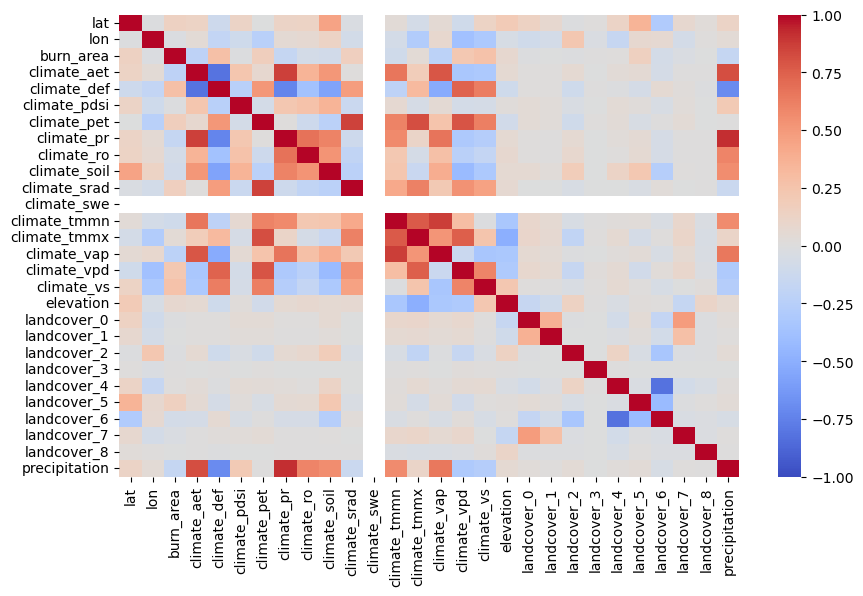

In [11]:
plt.figure(figsize=(10, 6))  # Width x Height in inches
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1,vmax=1)
plt.show()

## Training and Testing

Let's split the data into train and test so that we can meausure the accuracy of the model. We will use 20% of the dataset for testing

In [12]:

X = new_train_df.drop("burn_area", axis=1)
y = new_train_df["burn_area"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's standardise the dataset so it has the same weight

In [13]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

#### Implementing KNN Regression

In [14]:
model = KNeighborsRegressor() #initialize knn model

## Using GridSearchCV to find Best params

In [15]:
params_grid = {"n_neighbors": np.arange(1,30,2), # odd numbers from 1 to 15
               "weights": ["uniform", "distance"], 
                "metric": ["manhattan", "euclidean", "minkowski"]
}

In [16]:
# initialize GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params_grid, scoring='neg_mean_squared_error')
best_model = grid.fit(X_train_scaled, y_train)

In [18]:
y_pred = best_model.predict(X_test_scaled)

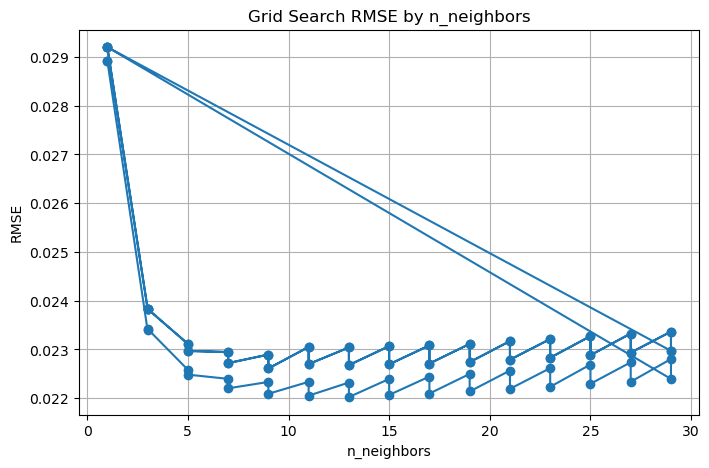

In [21]:
#visualize the results of the gridsearchcv
# Get parameter name
param_name = list(params_grid.keys())[0]

# Convert results to DataFrame
results = pd.DataFrame(best_model.cv_results_)

# Compute RMSE from the negative mean squared error
results['RMSE'] = np.sqrt(-results['mean_test_score'])              

plt.figure(figsize=(8, 5))
plt.plot(results['param_' + param_name], results['RMSE'], marker='o')
plt.xlabel(param_name)
plt.ylabel('RMSE')
plt.title('Grid Search RMSE by ' + param_name)
plt.grid(True)
plt.show()

In [22]:
# Best hyperparameters
print("Best Parameters:", best_model.best_params_)

# Best RMSE (convert from neg_mean_squared_error)
best_rmse = np.sqrt(-best_model.best_score_)
print("Best RMSE:", best_rmse)

# Best estimator (the actual trained model)
print("Best Model:")
print(best_model.best_estimator_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best RMSE: 0.022023734180892027
Best Model:
KNeighborsRegressor(metric='manhattan', n_neighbors=13, weights='distance')


#### Accuracy Checking

In [23]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = np.sqrt(mse)
rmse

0.021734195399377904

## Making Predictions with the Provided test dataset

#### Importing the test dataset

In [24]:
test_df = pd.read_csv("Test.csv")
test_df.sample(5)

,ID,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,precipitation
9397,336_2015-06-01,-19.608835,29.737029,20,812,-287,832,0,0,130,1930,0,56,214,875,86,197,1372.751576,0.0,0.0,0.0,0.0,0.004923,0.000000,0.993786,0.0,0.001291,0.000147
12095,369_2015-11-01,-19.858835,31.737029,485,1151,-321,1635,51,3,33,2586,0,174,311,1844,142,273,958.220470,0.0,0.0,0.0,0.0,0.042457,0.001844,0.955699,0.0,0.000000,0.084938
12379,120_2015-12-01,-17.608835,31.237029,1130,283,-568,1413,118,6,125,2475,0,164,285,1952,94,168,1388.341165,0.0,0.0,0.0,0.0,0.189258,0.016469,0.794273,0.0,0.000000,0.173827
20479,225_2017-03-01,-18.608835,28.987029,1183,70,879,1253,112,6,1109,2412,0,143,266,1912,65,239,1194.434588,0.0,0.0,0.0,0.0,0.351194,0.000000,0.648806,0.0,0.000000,0.120499
1870,271_2014-04-01,-19.108835,26.737029,255,914,131,1170,14,1,342,1993,0,132,286,1480,124,215,1039.389945,0.0,0.0,0.0,0.0,0.957340,0.000000,0.042660,0.0,0.000000,0.047512


The testing dataset does not have the burn_area column which is the feature we want to predict

Let's check if the test data has null values so we can remove them

In [25]:
test_df.isnull().sum()

ID               0
lat              0
lon              0
climate_aet      0
climate_def      0
climate_pdsi     0
climate_pet      0
climate_pr       0
climate_ro       0
climate_soil     0
climate_srad     0
climate_swe      0
climate_tmmn     0
climate_tmmx     0
climate_vap      0
climate_vpd      0
climate_vs       0
elevation        0
landcover_0      0
landcover_1      0
landcover_2      0
landcover_3      0
landcover_4      0
landcover_5      0
landcover_6      0
landcover_7      0
landcover_8      0
precipitation    0
dtype: int64

The dataset does not contain null values therefore no further action is needed. Let's explore the datatypes in the dataset.

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25584 entries, 0 to 25583
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             25584 non-null  object 
 1   lat            25584 non-null  float64
 2   lon            25584 non-null  float64
 3   climate_aet    25584 non-null  int64  
 4   climate_def    25584 non-null  int64  
 5   climate_pdsi   25584 non-null  int64  
 6   climate_pet    25584 non-null  int64  
 7   climate_pr     25584 non-null  int64  
 8   climate_ro     25584 non-null  int64  
 9   climate_soil   25584 non-null  int64  
 10  climate_srad   25584 non-null  int64  
 11  climate_swe    25584 non-null  int64  
 12  climate_tmmn   25584 non-null  int64  
 13  climate_tmmx   25584 non-null  int64  
 14  climate_vap    25584 non-null  int64  
 15  climate_vpd    25584 non-null  int64  
 16  climate_vs     25584 non-null  int64  
 17  elevation      25584 non-null  float64
 18  landco

The ID column is string object so we we will have to drop it. Let's do this by creating a new dataframe. Remember we will need this column in our results.

In [27]:
new_test_df = test_df.drop("ID", axis=1)

Now let's standardise the new_test_df and use it to make predictions

In [28]:
new_test_df_scaled = std_scale.transform(new_test_df)
pred = best_model.predict(new_test_df_scaled)

#### Writing predictions to csv

In [29]:
results_df = pd.DataFrame({
    "ID":test_df["ID"],
    "burn_area":pred

})

results_df.to_csv("submission_knn_regressor_grid.csv",index=False)

#### Training using the entire dataset

In [30]:
X = new_train_df.drop("burn_area", axis=1)
y = new_train_df["burn_area"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = KNeighborsRegressor(n_neighbors=13, metric='manhattan', weights='distance') #initialize knn model
model.fit(X_scaled, y)

test_df_scaled = scaler.transform(new_test_df)

preds = model.predict(test_df_scaled)

results_df = pd.DataFrame({
    "ID":test_df["ID"],
    "burn_area":preds

})

results_df.to_csv("submission_knn_regressor_grid_2.csv",index=False)